<a href="https://colab.research.google.com/github/me1539153-sys/ML01softgrowth/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is first task for my internship.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data = pd.read_csv("/content/german_credit_data.csv")

data.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


In [11]:
pd.set_option('display.max_columns', None)
data.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


In [12]:
pd.isnull(data).sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [13]:
sns.set_style("whitegrid")

In [15]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [17]:
data.duplicated().sum()

np.int64(0)

In [19]:
data.dropna().reset_index(drop=True)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [21]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [22]:
data.drop(columns='Unnamed: 0',inplace=True)

In [23]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Credit amount'}>],
       [<Axes: title={'center': 'Duration'}>, <Axes: >]], dtype=object)

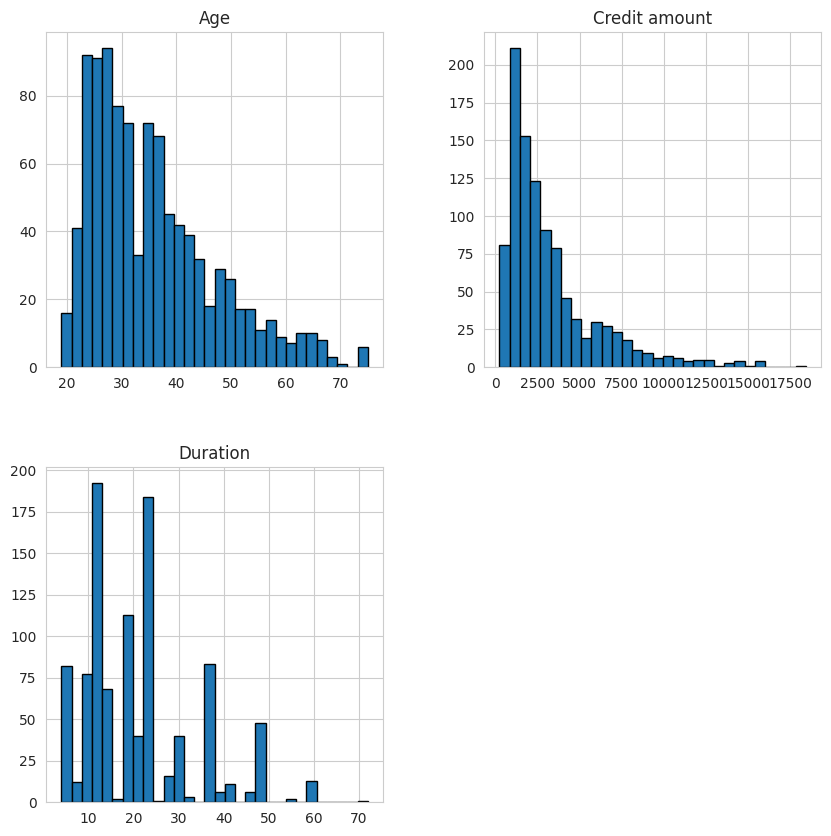

In [28]:
data[["Age","Credit amount","Duration"]].hist(bins=30,figsize=(10,10),edgecolor="black")

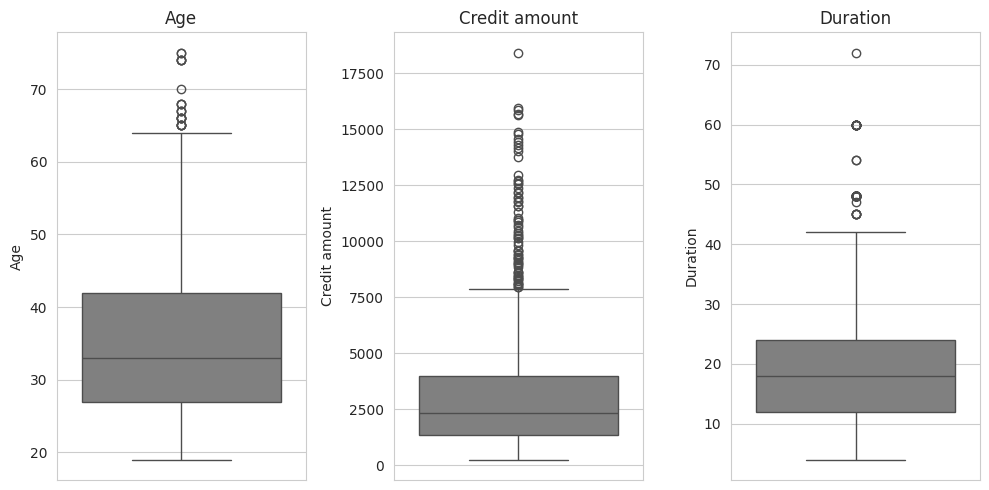

In [31]:
plt.figure(figsize=(10,5))
for i, col in enumerate(("Age","Credit amount","Duration")):
  plt.subplot(1,3,i+1)
  sns.boxplot(y = data[col], color="grey")
  plt.title(col)

plt.tight_layout()
plt.show()


In [32]:
data.query("Duration>= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,NaN,10144,60,radio/TV,good
255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,NaN,NaN,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,NaN,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,NaN,15653,60,radio/TV,good
672,42,male,3,own,little,NaN,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [33]:
categorial_cols  = ["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

/tmp/ipython-input-200752439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x=col,palette="Set2", order = data[col].value_counts().index)
/tmp/ipython-input-200752439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x=col,palette="Set2", order = data[col].value_counts().index)
/tmp/ipython-input-200752439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x=col,palette="Set2", order = data[col].value_counts().index)
/tmp/ipython-input-200752439.py:4: FutureWarning: 

Passing `palette` wit

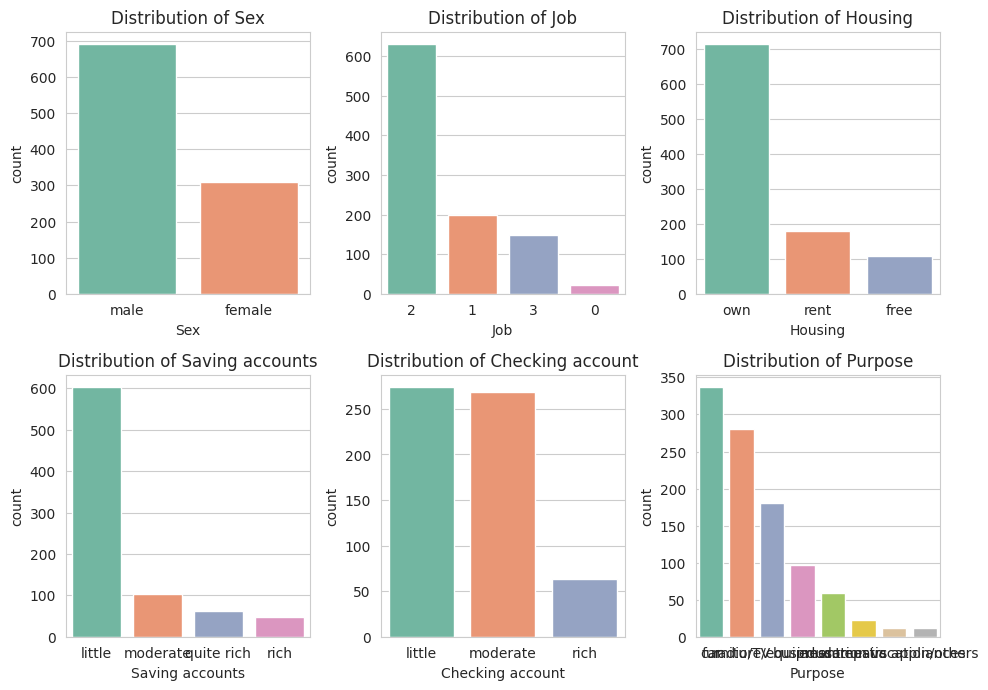

In [39]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorial_cols):
  plt.subplot(3,3,i+1)
  sns.countplot(data = data, x=col,palette="Set2", order = data[col].value_counts().index)
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [41]:
corr = data[["Age","Job","Credit amount","Duration"]].corr()

<Axes: >

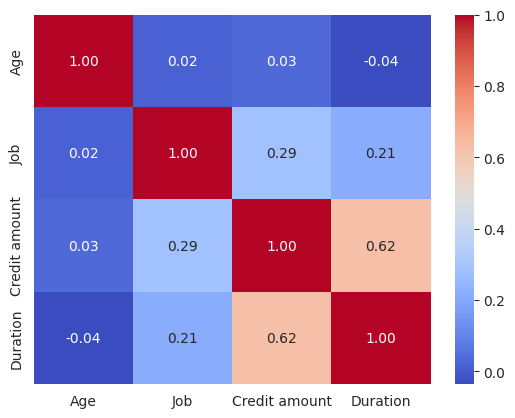

In [43]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

In [44]:
data.groupby("Job")["Credit amount"].mean()

,Credit amount
Job,
0,2745.136364
1,2358.520000
2,3070.965079
3,5435.493243


In [45]:
data.groupby("Sex")["Credit amount"].mean()

,Credit amount
Sex,
female,2877.774194
male,3448.040580


In [46]:
pd.pivot_table(data, index="Housing", columns="Purpose", values="Credit amount", aggfunc="mean")
#

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


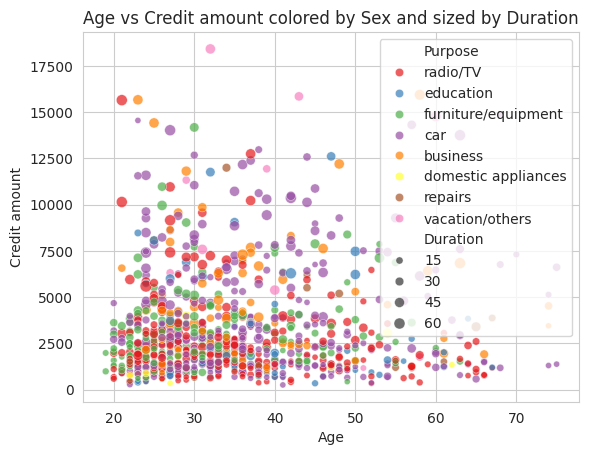

In [49]:
sns.scatterplot(data=data, x="Age", y="Credit amount", hue="Purpose",size = "Duration", alpha = 0.7, palette="Set1")
plt.title("Age vs Credit amount colored by Sex and sized by Duration")
plt.show()


/tmp/ipython-input-3234322848.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="Saving accounts", y="Credit amount", palette="Pastel1")


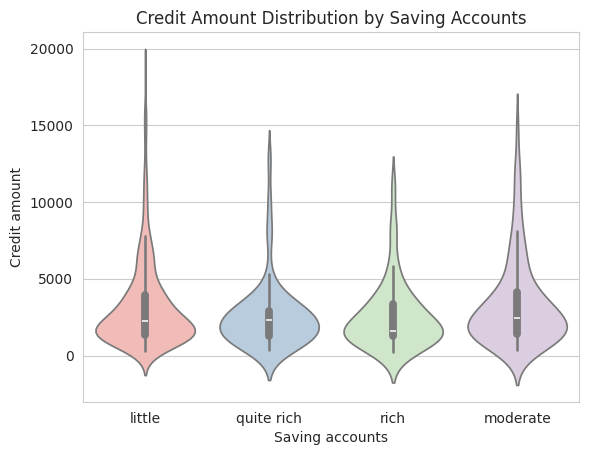

In [52]:
sns.violinplot(data=data, x="Saving accounts", y="Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [53]:
data["Risk"].value_counts(normalize= True)*100

,proportion
Risk,
good,70.0
bad,30.0


/tmp/ipython-input-1080860862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=data, palette="Set2")
/tmp/ipython-input-1080860862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=data, palette="Set2")
/tmp/ipython-input-1080860862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=data, palette="Set2")


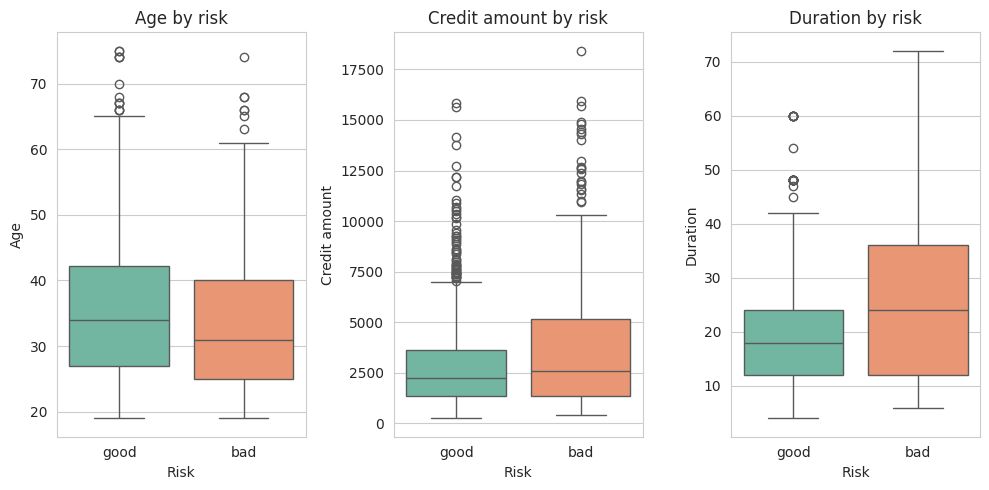

In [57]:
plt.figure(figsize=(10,5))
for i, col in enumerate(["Age","Credit amount","Duration"]):
  plt.subplot(1,3,i+1)
  sns.boxplot(x="Risk", y=col, data=data, palette="Set2")
  plt.title(f"{col} by risk")

plt.tight_layout()
plt.show()





In [58]:
data.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [59]:
categorial_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

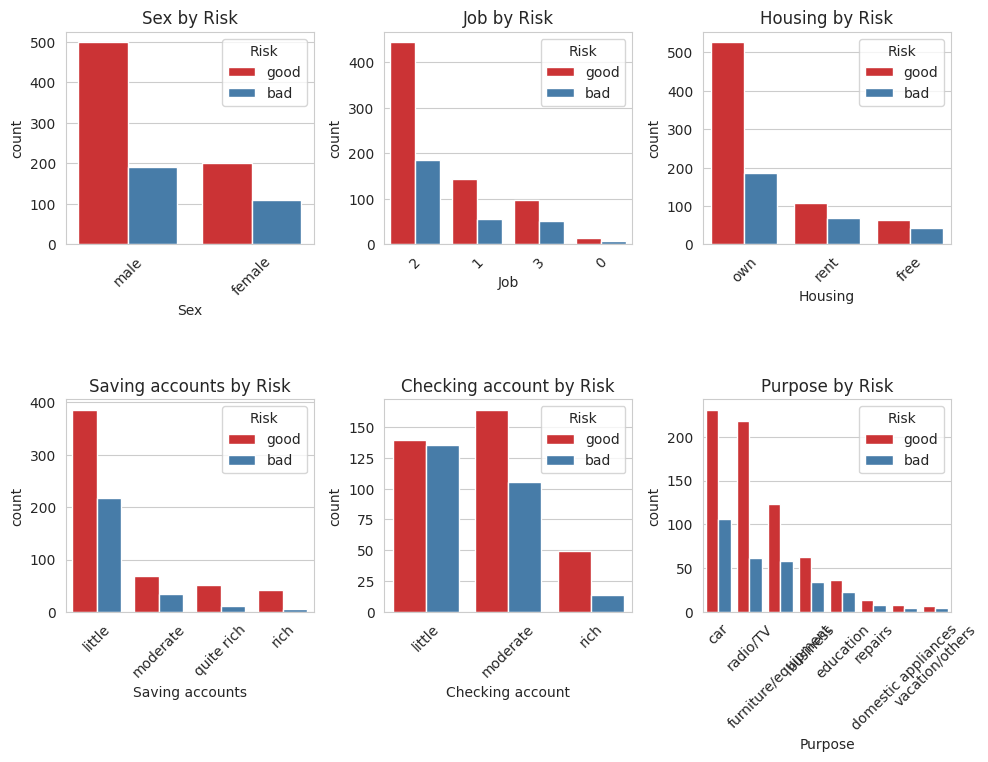

In [62]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorial_cols):
  plt.subplot(3,3,i+1)
  sns.countplot(data=data, x=col, hue="Risk", palette="Set1",order = data[col].value_counts().index)
  plt.title(f"{col} by Risk")
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [70]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [71]:
feature = ["Age","Credit amount","Duration","Housing","Saving accounts","Sex","Job","Checking account"]

In [72]:
target = "Risk"

In [75]:
data_model = data[feature + [target]].copy()

In [76]:
data_model.head()

,Age,Credit amount,Duration,Housing,Saving accounts,Sex,Job,Checking account,Risk
0,67,1169,6,own,NaN,male,2,little,good
1,22,5951,48,own,little,female,2,moderate,bad
2,49,2096,12,own,little,male,1,NaN,good
3,45,7882,42,free,little,male,2,little,good
4,53,4870,24,free,little,male,2,little,bad


In [77]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [78]:
cat_cols = data_model.select_dtypes(include="object").columns.drop("Risk")

In [79]:
le_dict = {}

In [80]:
cat_cols

Index(['Housing', 'Saving accounts', 'Sex', 'Checking account'], dtype='object')

In [83]:
for i, col in enumerate(cat_cols):
  le = LabelEncoder()
  data_model[col] = le.fit_transform(data_model[col])
  le_dict[col] = le
  joblib.dump(le, f"label_encoder_{col}.pkl")

In [82]:
le_target = LabelEncoder()
data_model[target] = le_target.fit_transform(data_model[target])

In [84]:
target

'Risk'

In [85]:
data_model[target] = le_target.fit_transform(data_model[target])

In [88]:
data_model[target].value_counts()

,count
Risk,
1,700
0,300


In [89]:
joblib.dump(le_target, "label_encoder_target.pkl")

['label_encoder_target.pkl']

In [90]:
data_model.head()

,Age,Credit amount,Duration,Housing,Saving accounts,Sex,Job,Checking account,Risk
0,67,1169,6,1,4,1,2,0,1
1,22,5951,48,1,0,0,2,1,0
2,49,2096,12,1,0,1,1,3,1
3,45,7882,42,0,0,1,2,0,1
4,53,4870,24,0,0,1,2,0,0
